<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-08-15 08:48:12--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf [following]
--2024-08-15 08:48:12--  https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf [following]
--2024-08-15 08:48:13--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [3]:
import numpy as np
import itertools

## 5-1

In [4]:
from scipy import stats

## 5-2

In [54]:
num_heads = 16
num_flips = 20
prob_head = 0.5
prob = stats.binomtest(num_heads, num_flips, prob_head)
print(f"15개 이상의 동전 앞면 또는 뒷면이 관찰될 확률은 {prob.pvalue:.17f}입니다.")

15개 이상의 동전 앞면 또는 뒷면이 관찰될 확률은 0.01181793212890625입니다.


## 5-3

In [9]:
prob_16_heads = stats.binom.pmf(num_heads, num_flips, prob_head)
print(f"{num_heads}번의 앞면 중 {num_flips}번이 관측될 확률은 {prob_16_heads}입니다.")

16번의 앞면 중 20번이 관측될 확률은 0.004620552062988283입니다.


## 5-4

In [10]:
probabilities = stats.binom.pmf([4, 16], num_flips, prob_head)
assert probabilities.tolist() == [prob_16_heads] * 2

## 5-5

In [11]:
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)
total_prob = probabilities.sum()
print(f"확률의 총합은 {total_prob:.14f}입니다.")

확률의 총합은 1.00000000000000입니다.


## 5-6

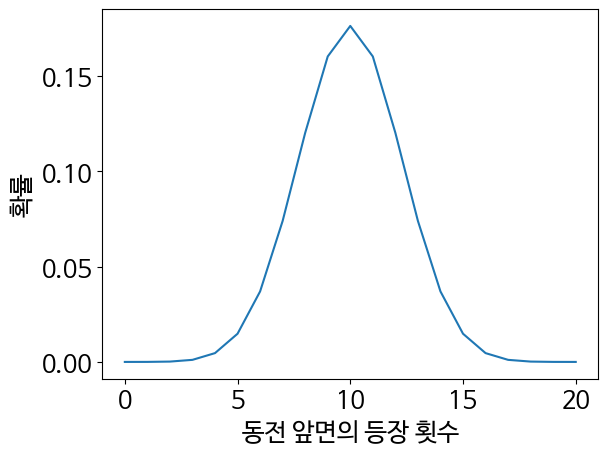

In [12]:
import matplotlib.pyplot as plt
plt.plot(interval_all_counts, probabilities)
plt.xlabel('동전 앞면의 등장 횟수')
plt.ylabel('확률')
plt.show()

## 5-7

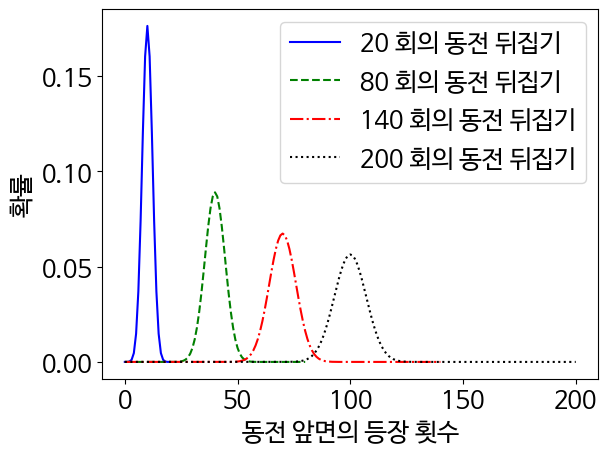

In [14]:
flip_counts = [20, 80, 140, 200]
linestyles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'k']

for num_flips, linestyle, color in zip(flip_counts, linestyles, colors):
    x_values = range(num_flips + 1)
    y_values = stats.binom.pmf(x_values, num_flips, 0.5)
    plt.plot(x_values, y_values, linestyle=linestyle, color=color,
label=f'{num_flips} 회의 동전 뒤집기')

plt.legend()
plt.xlabel('동전 앞면의 등장 횟수')
plt.ylabel('확률')
plt.show()

## 5-8

In [15]:
import numpy as np
measurements = np.array([80, 77, 73, 61, 74, 79, 81])

## 5-9

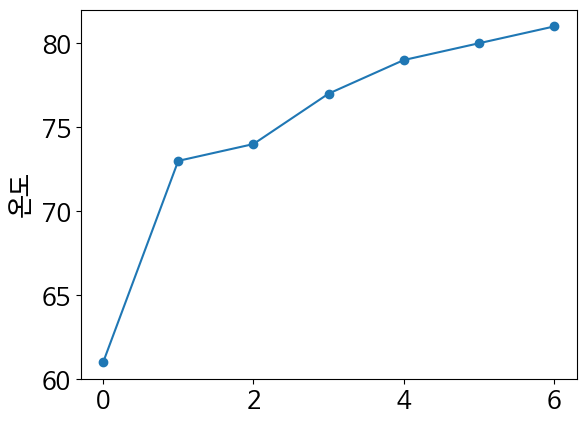

In [16]:
measurements.sort()
number_of_days = measurements.size
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.ylabel('온도')
plt.show()

## 5-10

In [17]:
difference = measurements.max() - measurements.min()
midpoint = measurements.min() + difference / 2
assert midpoint == (measurements.max() + measurements.min()) / 2
print(f"중간 온도는 {midpoint}도 입니다 ")

중간 온도는 71.0도 입니다 


## 5-11

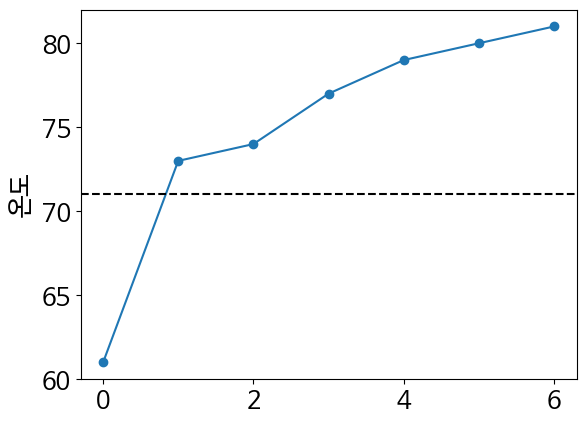

In [18]:
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--')
plt.ylabel('온도')
plt.show()

## 5-12

온도의 중앙값은 77도 입니다


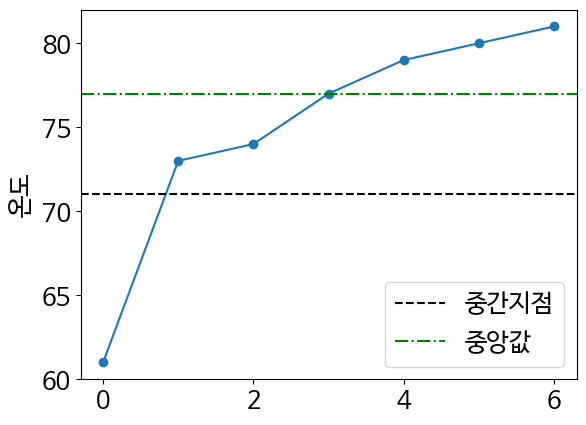

In [20]:
median = measurements[3]
print(f"온도의 중앙값은 {median}도 입니다")
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--', label='중간지점')
plt.axhline(median, color='g', linestyle='-.', label='중앙값')
plt.legend()
plt.ylabel('온도')
plt.show()

## 5-13

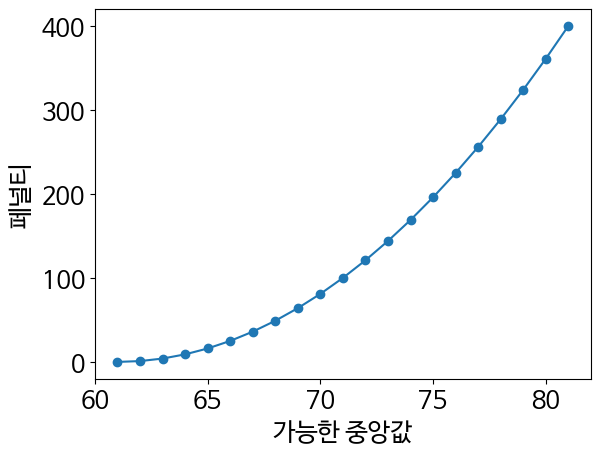

In [21]:
def squared_distance(value1, value2):
    return (value1 - value2) ** 2

possible_centers = range(measurements.min(), measurements.max() + 1)
penalties = [squared_distance(center, 61) for center in possible_centers]

plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('가능한 중앙값')
plt.ylabel('페널티')
plt.show()

## 5-14

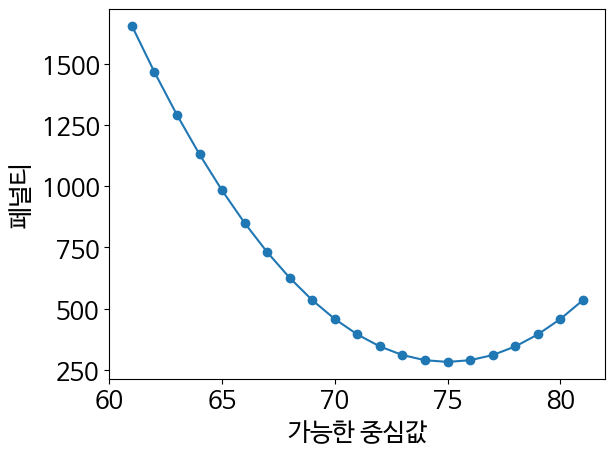

In [22]:
def sum_of_squared_distances(value, measurements):
    return sum(squared_distance(value, m) for m in measurements)

penalties = [sum_of_squared_distances(center, measurements)
    for center in possible_centers]

plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('가능한 중심값')
plt.ylabel('페널티')
plt.show()

## 5-15

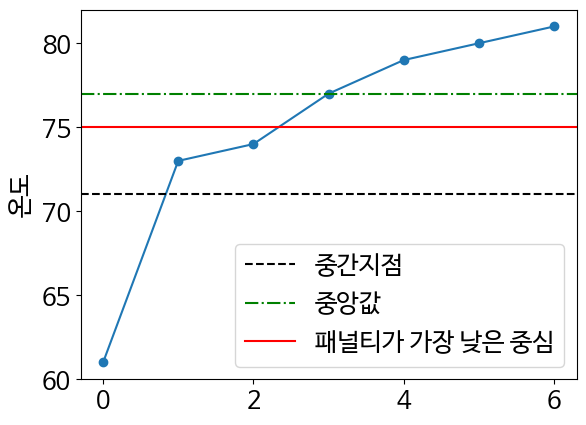

In [24]:
least_penalized = 75
assert least_penalized == possible_centers[np.argmin(penalties)]

plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--', label='중간지점')
plt.axhline(median, color='g', linestyle='-.', label='중앙값')
plt.axhline(least_penalized, color='r', linestyle='-', label='패널티가 가장 낮은 중심')
plt.legend()
plt.ylabel('온도')
plt.show()

## 5-16

In [25]:
assert measurements.sum() / measurements.size == least_penalized

## 5-17

In [26]:
mean = measurements.mean()
assert mean == least_penalized
assert mean == np.mean(measurements)
assert mean == np.average(measurements)

## 5-18

In [27]:
equal_weights = [1] * 7
assert mean == np.average(measurements, weights=equal_weights)

unequal_weights = [100] + [1] * 6
assert mean != np.average(measurements, weights=unequal_weights)

## 5-19

In [28]:
weighted_mean = np.average([75, 77], weights=[9, 1])
print(f"평균은 {weighted_mean}입니다.")
assert weighted_mean == np.mean(9 * [75] + [77]) == weighted_mean

평균은 75.2입니다.


## 5-20

In [29]:
assert weighted_mean == np.average([75, 77], weights=[900, 100])
assert weighted_mean == np.average([75, 77], weights=[0.9, 0.1])

## 5-21

이항 분포의 평균은 동전 앞면이 10.00번 등장할 때입니다.


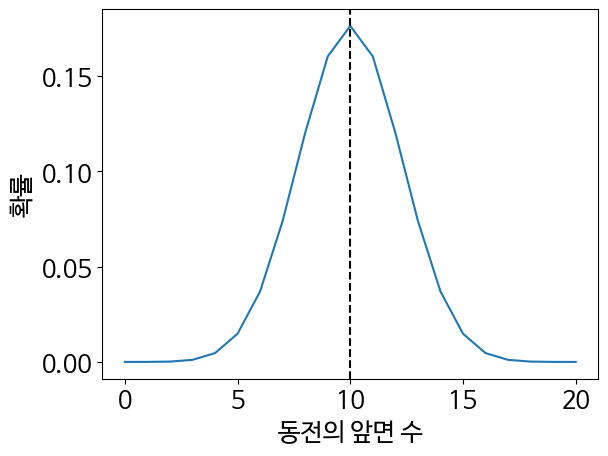

In [30]:
num_flips = 20
interval_all_counts = range(num_flips + 1)
probabilities = stats.binom.pmf(interval_all_counts, 20, prob_head)
mean_binomial = np.average(interval_all_counts, weights=probabilities)
print(f"이항 분포의 평균은 동전 앞면이 {mean_binomial:.2f}번 등장할 때입니다.")

plt.plot(interval_all_counts, probabilities)
plt.axvline(mean_binomial, color='k', linestyle='--')
plt.xlabel('동전의 앞면 수')
plt.ylabel('확률')
plt.show()

## 5-22

In [31]:
assert stats.binom.mean(num_flips, 0.5) == 10

## 5-23

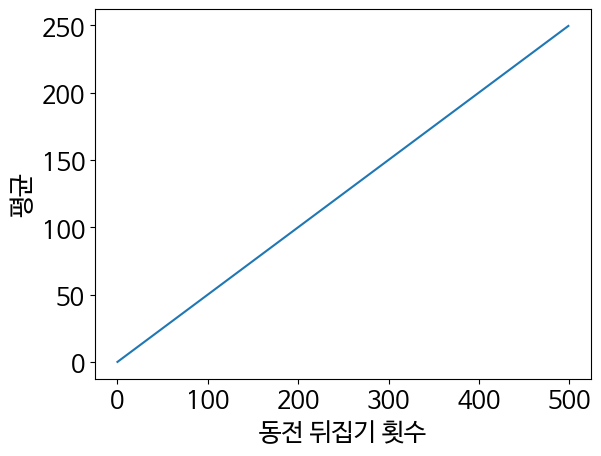

In [32]:
means = [stats.binom.mean(num_flips, 0.5) for num_flips in range(500)]
plt.plot(range(500), means)
plt.xlabel('동전 뒤집기 횟수')
plt.ylabel('평균')
plt.show()


## 5-24

In [33]:
num_flips = 1
assert stats.binom.mean(num_flips, 0.5) == 0.5

## 5-25

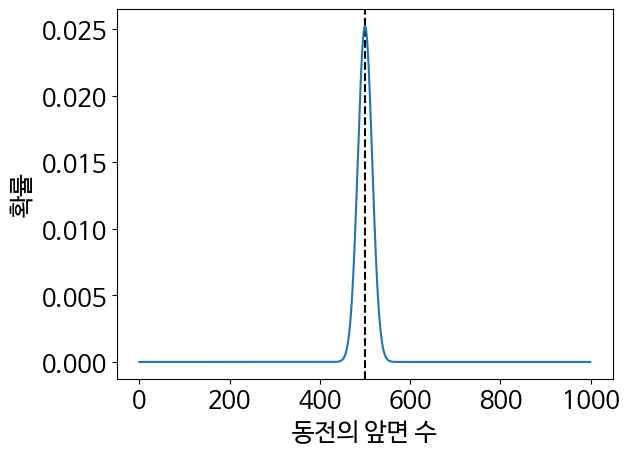

In [34]:
num_flips = 1000
assert stats.binom.mean(num_flips, 0.5) == 500

interval_all_counts = range(num_flips)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, 0.5)
plt.axvline(500, color='k', linestyle='--')
plt.plot(interval_all_counts, probabilities)
plt.xlabel('동전의 앞면 수')
plt.ylabel('확률')
plt.show()

## 5-26

In [35]:
california = np.array([52, 77, 96])
kentucky = np.array([71, 75, 79])

print(f"캘리포니아 주의 평균 온도는 {california.mean()}입니다.")
print(f"켄터키 주의 평균 온도는 {california.mean()}입니다.")

캘리포니아 주의 평균 온도는 75.0입니다.
켄터키 주의 평균 온도는 75.0입니다.


## 5-27

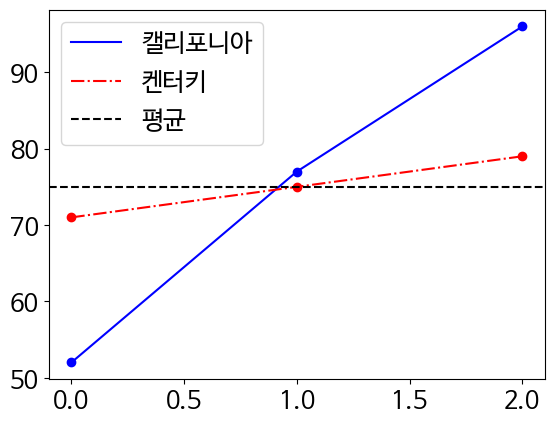

In [38]:
plt.plot(range(3), california, color='b', label='캘리포니아')
plt.scatter(range(3), california, color='b')
plt.plot(range(3), kentucky, color='r', linestyle='-.', label='켄터키')
plt.scatter(range(3), kentucky, color='r')
plt.axhline(75, color='k', linestyle='--', label='평균')
plt.legend()
plt.show()

## 5-28

In [39]:
def sum_of_squares(data):
    mean = np.mean(data)
    return sum(squared_distance(value, mean) for value in data)

california_sum_squares = sum_of_squares(california)
print(f"캘리포니아 온도의 제곱합은 {california_sum_squares}입니다.")

캘리포니아 온도의 제곱합은 974.0입니다.


## 5-29

In [40]:
kentucky_sum_squares = sum_of_squares(kentucky)
print(f"켄터키 온도의 제곱합은 {kentucky_sum_squares}입니다.")

켄터키 온도의 제곱합은 32.0입니다.


## 5-30

In [41]:
california_duplicated = np.array(california.tolist() * 2)
duplicated_sum_squares = sum_of_squares(california_duplicated)
print(f"복제된 캘리포니아 온도의 제곱합은 {duplicated_sum_squares}입니다.")
assert duplicated_sum_squares == 2 * california_sum_squares

복제된 캘리포니아 온도의 제곱합은 1948.0입니다.


## 5-31

In [42]:
value1 = california_sum_squares / california.size
value2 = duplicated_sum_squares / california_duplicated.size
assert value1 == value2

## 5-32

In [43]:
def variance(data):
    mean = np.mean(data)
    return np.mean([squared_distance(value, mean) for value in data])

assert variance(california) == california_sum_squares / california.size

## 5-33

In [44]:
assert variance(california) == variance(california_duplicated)

## 5-34

In [45]:
california_variance = variance(california)
kentucky_variance = variance(kentucky)
print(f"캘리포니아의 온도에 대한 분산은 {california_variance}입니다.")
print(f"켄터키의 온도에 대한 분산은 {kentucky_variance}입니다.")

캘리포니아의 온도에 대한 분산은 324.6666666666667입니다.
켄터키의 온도에 대한 분산은 10.666666666666666입니다.


## 5-35

In [46]:
assert california_variance == california.var()
assert california_variance == np.var(california)

## 5-36

In [47]:
def weighted_variance(data, weights):
    mean = np.average(data, weights=weights)
    squared_distances = [squared_distance(value, mean) for value in data]
    return np.average(squared_distances, weights=weights)

assert weighted_variance([75, 77], [9, 1]) == np.var(9 * [75] + [77])

## 5-37

In [48]:
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, 20, prob_head)
variance_binomial = weighted_variance(interval_all_counts, probabilities)
print(f"이항 분포의 분산은 동전 앞면이{variance_binomial:.2f}번 등장했을 때입니다")

이항 분포의 분산은 동전 앞면이5.00번 등장했을 때입니다


## 5-38

In [49]:
assert stats.binom.var(20, prob_head) == 5.0
assert stats.binom.var(20, prob_head) == stats.binom.mean(20, prob_head) / 2

## 5-39

In [56]:
stats.binom.var(num_flips, prob_head)

0.0

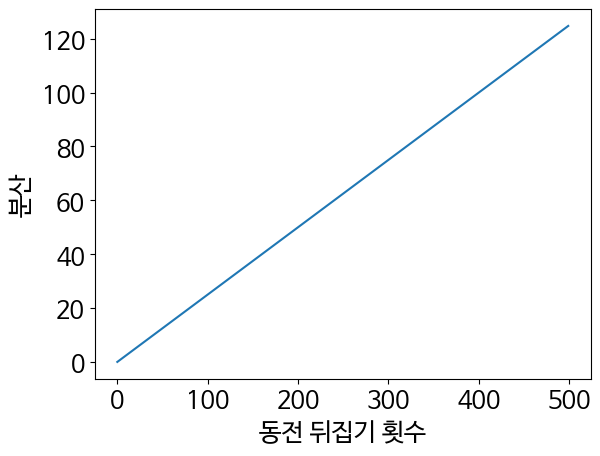

In [59]:
variances = []

for num_flips in range(500):
    variances.append([stats.binom.var(num_flips, prob_head)])

plt.plot(range(500), variances)
plt.xlabel('동전 뒤집기 횟수')
plt.ylabel('분산')
plt.show()

## 5-40

In [60]:
assert stats.binom.var(1, 0.5) == 0.25
assert stats.binom.var(1000, 0.5) == 250

## 5-41

In [61]:
data = [1, 2, 3]
standard_deviation = np.std(data)
assert standard_deviation ** 2 == np.var(data)